In [256]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

%matplotlib inline

In [62]:
data = pd.read_csv('2016.0806-2016.0822_Olympics_Tweets_Cleaned_With_Emojis.csv', parse_dates=['created'])

In [63]:
data.shape

(449680, 11)

In [64]:
data.columns = [u'tweetid', u'text', u'created', u'url', u'latitude', u'longitude',
                u'retweets', u'hashtag', u'z', u'num_emojis', u'emoji_names']

In [65]:
data['new_date'] = [datetime.strptime(date.strftime('%Y %b %d, %H:%M'), '%Y %b %d, %H:%M')\
                  for date in data.created]

In [348]:
data['day'] = [i.day for i in data.new_date]
data['hour'] = [i.hour for i in data.new_date]
data['minutes'] = [i.minute for i in data.new_date]

In [279]:
data['date_per_day'] = [datetime.strptime(date.strftime('%Y %b %d'), '%Y %b %d')\
                  for date in data.new_date]

In [377]:
data['new_text'] = [''.join([i for i in o if not i.isdigit()]) for o in data.text]

In [ ]:
### Important Events

Important Events-

2016-08-6:French leg injury, hope solo gets taunted, U.S basketball wins
2016-08-7:Katie Ledecky breaks the world record
2016-08-8: U.S Lilly King wins swimming gold, U.S basketball wins again
2016-08-9: U.S Woman's Gymnastics Dominates, Michael Phelps wins gold, Serena Williams loses, first rugby game is played <br>
2016-08-10: U.S. almost loses in Basketball and swimming, U.S. gets first silver in fencing <br>
2016-08-11: Simone Biles wins medals, Michael Phelps wins gold, rugby returns to the olympics
2016-08-12: Women's soccer loses, Ledecky wins another gold, u.s basketball game
2016-08-13: men u.s swimming wins gold, first bolt race
2016-08-14: U.S swimmers robbed at gun point, bolt runs again
2016-08-15:simone biles loses, it rains hard
2016-08-16: simone biles gets another gold, kerry walsh loses, usa basketball almost loses
2016-08-17: Swimmers 'held at gunpoint' in trouble, gatlin doesn't advance
2016-08-18: bolt still winning, first u.s women wrestling champion, u.s basketball does well
2016-08-19: Ryan lochte in trouble about being held at gunpoint, Usain Bolt wins gold!
2016-08-20: U.s basketball wins gold!

In [362]:
for i in range(6,23):
    time = data[data.day == i]
    print 'In October %r the tweets are from %rth: - %rth hour'%(i ,time.hour.min(), time.hour.max())
     

In October 6 the tweets are from 23th: - 23th hour
In October 7 the tweets are from 22th: - 23th hour
In October 8 the tweets are from 22th: - 23th hour
In October 9 the tweets are from 22th: - 23th hour
In October 10 the tweets are from 22th: - 23th hour
In October 11 the tweets are from 22th: - 23th hour
In October 12 the tweets are from 22th: - 23th hour
In October 13 the tweets are from 22th: - 23th hour
In October 14 the tweets are from 22th: - 23th hour
In October 15 the tweets are from 22th: - 23th hour
In October 16 the tweets are from 22th: - 23th hour
In October 17 the tweets are from 22th: - 23th hour
In October 18 the tweets are from 21th: - 23th hour
In October 19 the tweets are from 22th: - 23th hour
In October 20 the tweets are from 23th: - 23th hour
In October 21 the tweets are from 23th: - 23th hour
In October 22 the tweets are from 17th: - 23th hour


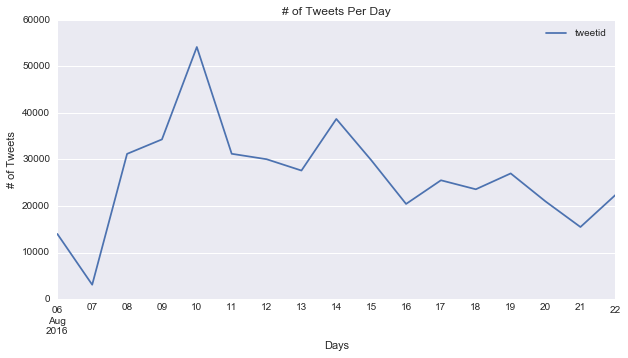

In [363]:
test = pd.DataFrame(data.groupby('date_per_day').count()['tweetid'])
g = test.plot()
plt.xlabel('Days')
plt.ylabel('# of Tweets')
plt.title('# of Tweets Per Day')
g.figure.set_size_inches(10,5)

### Why is there so many tweets in the 10th if it streamed for the same time as the other days?

In [389]:
the_tenth = data[data.date_per_day == datetime.datetime.strptime('2016-08-10', '%Y-%m-%d')]


## Sentiment Analysis

In [379]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count = CountVectorizer(stop_words = stop_words, min_df = 10, max_df = .7) 
x = count.fit_transform(the_tenth.new_text)
df = pd.DataFrame(x.todense())
df.columns = count.vocabulary_
names = []
frequency = []
for i in df.columns:
    names.append(i)
    frequency.append(np.sum(df[i]))

final_df = pd.DataFrame({'names': names, 'frequency': frequency})
print final_df.sort_values('frequency', ascending = False).head(30)

      frequency            names
1333      45909             many
432       18486          deporte
872       17681            shown
2085      17632          pessoas
433       15558            venha
51         9900       medallista
2          8638            igual
4550       6003  eusoutimebrasil
480        5026     mensfootball
369        4797     australiausa
752        4792              sen
1339       4647               ef
3095       4597        cualquier
70         4590        seriously
411        4238        realmente
326        3657            puede
4          3277        medallero
69         2997         entering
863        2789               ed
24         2725            goles
427        2551            himno
730        2540        champions
334        2181             abra
531        2044          picture
3724       1870          mirando
4252       1685          chances
1770       1590         arranque
4268       1480            swear
1470       1459            rules
392       

In [387]:
the_tenth = data[data.date_per_day == datetime.datetime.strptime('2016-08-10', '%Y-%m-%d')]

tfidf_vectorizer = TfidfVectorizer(max_df = 0.4, min_df = 15, stop_words = stop_words)
tfidf = tfidf_vectorizer.fit_transform(the_tenth.new_text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components = 15, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic:" + str(int(topic_idx)+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))


transformed_data = nmf.transform(tfidf)
print_top_words(nmf, tfidf_feature_names, 20)

Topic:1
ed bd bf bb melo ba ceremoniadeclausura brasil teamgb bra fencing lindo egy weightlifting juegosolimpicos est olimpiadas bronze teamusa carmeloanthony
Topic:2
co https ceremoniadeclausura juegosolimpicos olympic clausura via gold medal rioolympics live final ceremonia olympicgames oro ba bra mex gt phelps
Topic:3
aa nhk ae ac nis daihyo cad tun etv ad ab voc bc quero jfa ncia alkasschannel af fencing pisca
Topic:4
af ac ad egy ab weightlifting alkasschannel db ae aa bronze egypt swe jpn tun rioolympics riototokyo dyujrxnle escrime https
Topic:5
usa aus baloncesto australia vs partidazo final partido team carmelo anthony basquetebol est melo basketball juegosolimpicos descanso leads jogo vaya
Topic:6
cerimoniadeencerramento riototokyo bra lindo gente pra frevo brasil atletas vai quero hino olimp chuva jogosolimpicos tudo povo olimpiadas olha nis
Topic:7
ef bd bc tbs ac ab daihyo jpn cf jfa soccer smap football cc tabletennis gold frevo gt peor aa
Topic:8
basketball boomers game 

## They're not really clear

# Emojis

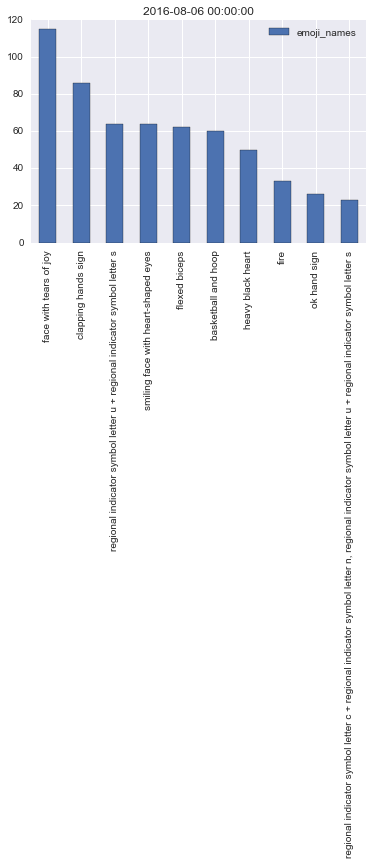

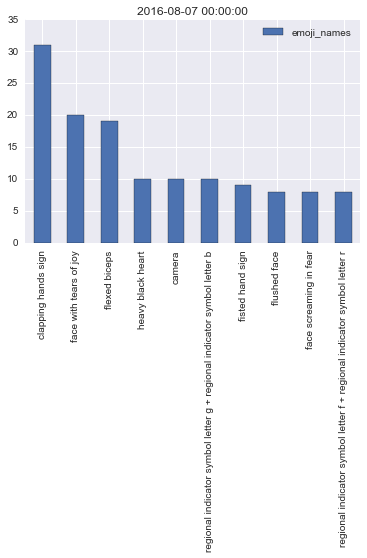

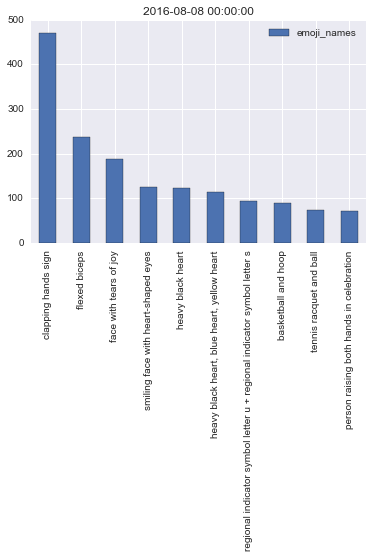

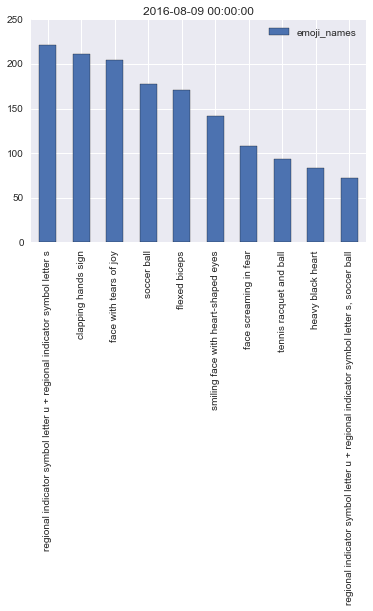

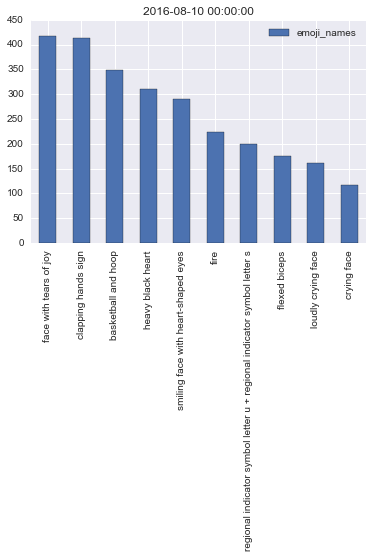

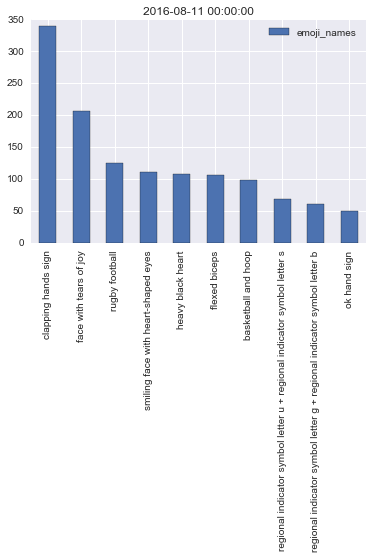

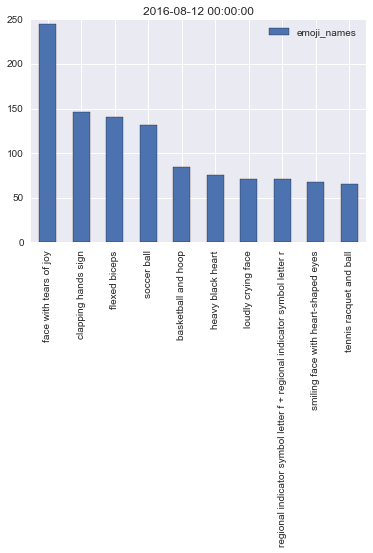

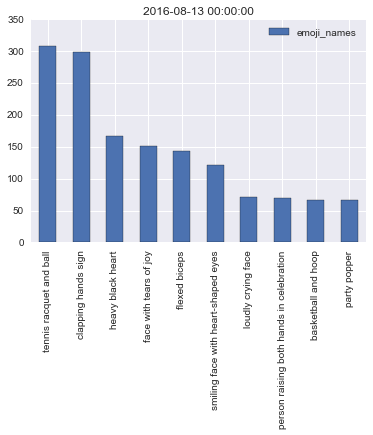

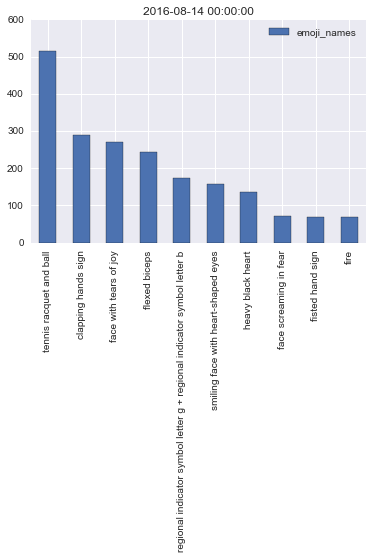

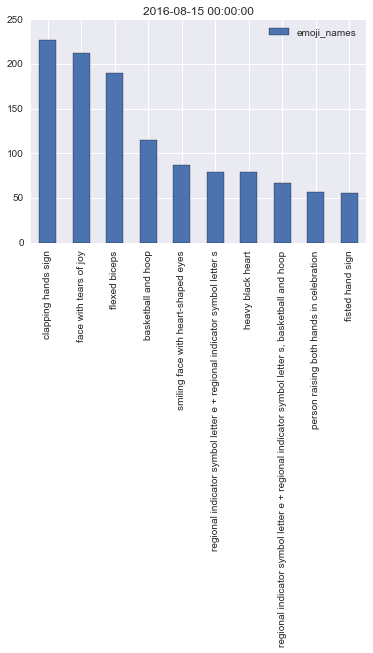

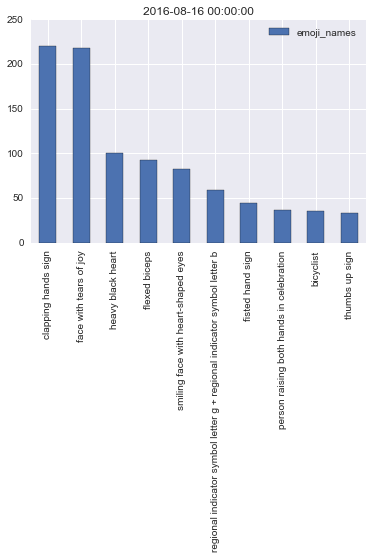

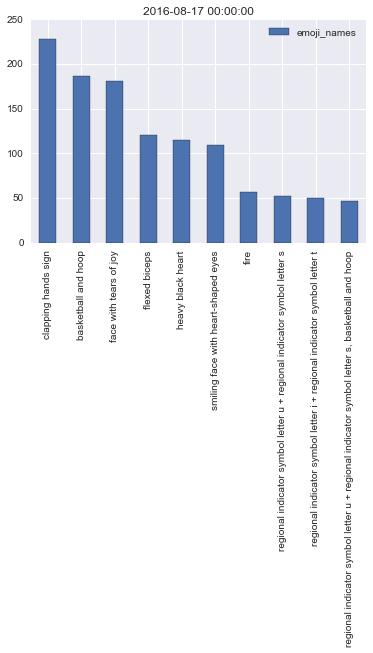

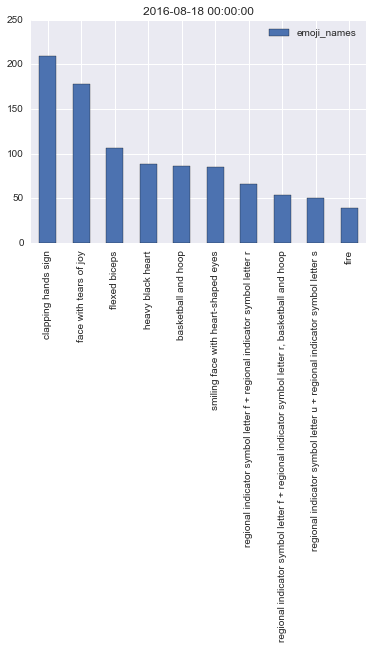

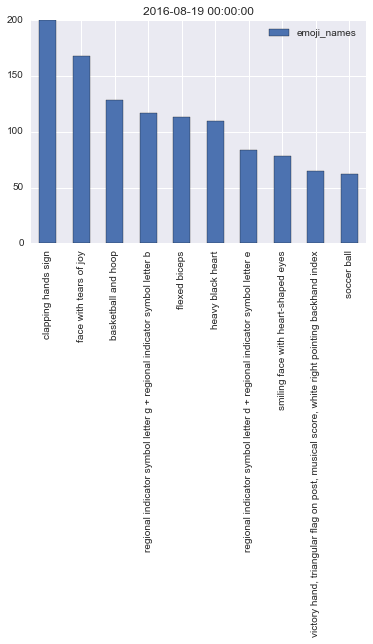

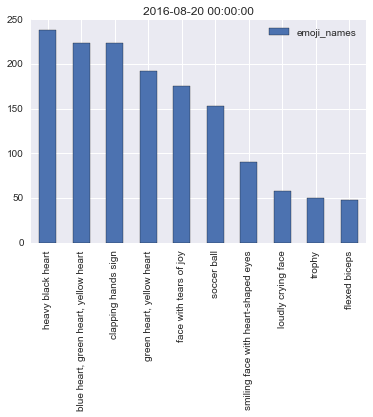

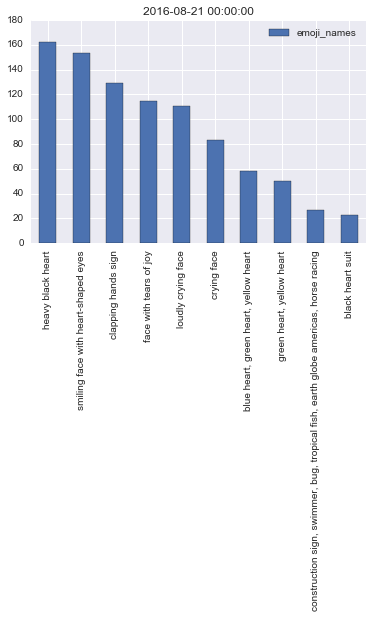

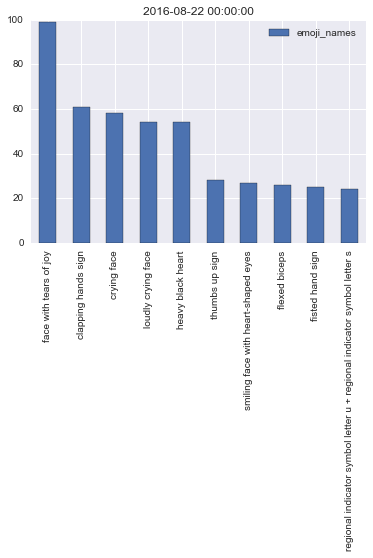

In [292]:
day_dict = {}
for i in test.index:
    temp = data[data.date_per_day == i]
    top_5_emojis = temp.emoji_names.value_counts()[:10]
    day_dict[i] = top_5_emojis
    g = pd.DataFrame(top_5_emojis).plot(kind = 'bar')
    plt.title(i)
    plt.show()

### Top Emojis Over Time

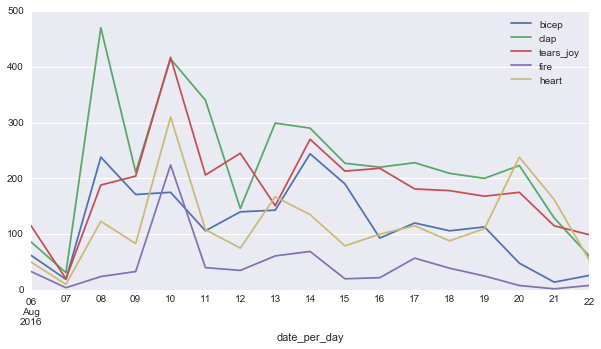

In [392]:
data[data.emoji_names== 'flexed biceps'].groupby('date_per_day').count()['tweetid'].plot(label = 'bicep')
data[data.emoji_names== 'clapping hands sign'].groupby('date_per_day').count()['tweetid'].plot(label ='clap')
data[data.emoji_names== 'face with tears of joy'].groupby('date_per_day').count()['tweetid'].plot(label ='tears_joy')
data[data.emoji_names== 'fire'].groupby('date_per_day').count()['tweetid'].plot(label ='fire')
g = data[data.emoji_names== 'heavy black heart'].groupby('date_per_day').count()['tweetid'].plot(label ='heart')

plt.legend()
g.figure.set_size_inches(10,5)